## Using k-means Clustering to Compress an Image

This code shows an example of using k-means clustering to compress a photo. The
image is 128 x 128 pixels in RGB, but using k-means each pixel is given the color
of the centroid of the cluster it belongs to. A total of 16 clusters (and thus 16
different colors) are defined for a start. All four main operations - random cluster centroid 
initialization, location of nearest centroids, computation of new centroid 
locations, and execution of the entire k-means loop - are programmed from scratch, 
to show the algorithms behind this classification method.

### Find closest centroids, Compute new centroids, Initialize centroids, and Run k-means functions

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

def find_closest_centroids(X, centroids):       # find closest centroid for each data sample in X
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)                           # array where we keep the centroids attached to each data point
    
    for i in range(m):                          # for each data point
        min_dist = 1000000                      # define a default maximum distance (very large number)
        for j in range(k):                      # for each centroid
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)       # calculate squared distance (x2-x1)^2 + (y2-y1)^2 (no need for root)
            if dist < min_dist:                                 # if it is the smallest distance:
                min_dist = dist                 # remember it
                idx[i] = j                      # remember the centroid
    
    return idx

def compute_centroids(X, idx, k):               # compute new values for centroids
    m, n = X.shape                              # m is number of data points, n is dimension of data points
    centroids = np.zeros((k, n))                # k is number of centroids (clusters)
    
    for i in range(k):                          # for each centroid:
        indices = np.where(idx == i)            # return a list of indices of the elements of idx that belong to that centroid cluster
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()  # calculate the new value of the centroid location
    
    return centroids

def init_centroids(X, k):                   # randomly initialize centroid locations
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)        # randomly initialize a list of k numbers between 0 and m
    for i in range(k):                      # for each centroid:
        centroids[i,:] = X[idx[i],:]        # position it at the same location as the idx-th data point
    
    return centroids

def run_k_means(X, initial_centroids, max_iters):   # run the k-means classification algorithm
    m, n = X.shape                                  # m is number of data points, n is dimension of data points
    k = initial_centroids.shape[0]                  # k is number of centroids (clusters)
    idx = np.zeros(m)                               # idx will store the centroids attached to each data point
    centroids = initial_centroids                   # initialize centroids
    
    for i in range(max_iters):                      # in every iteration:
        idx = find_closest_centroids(X, centroids)  # find the closest centroid for each data point
        centroids = compute_centroids(X, idx, k)    # update the centroid locations 
    
    return idx, centroids 

### Import, display, and prepare image

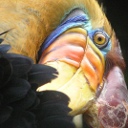

Number of pixels (rows): 16384
Number of colors (columns)  3
Data:
 [[0.85882353 0.70588235 0.40392157]
 [0.90196078 0.7254902  0.45490196]
 [0.88627451 0.72941176 0.43137255]
 ...
 [0.25490196 0.16862745 0.15294118]
 [0.22745098 0.14509804 0.14901961]
 [0.20392157 0.15294118 0.13333333]]


In [30]:
from IPython.display import Image, display
display(Image(filename='bird_small.png'))

image_data = loadmat('bird_small.mat')
A = image_data['A']

# normalize value ranges
A = A / 255.

# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
print ("Number of pixels (rows):",np.size(X,axis=0))
print ("Number of colors (columns) ",np.size(X,axis=1))
print ("Data:\n",X)

### Cluster the pixels and recolor the image using the centroids colors

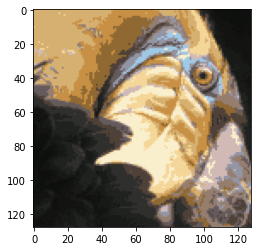

In [21]:
n_clus = 16

# randomly initialize the centroids of the clusters 
initial_centroids = init_centroids(X, n_clus)

# run the algorithm for 10 iterations 
idx, centroids = run_k_means(X, initial_centroids, 10)

# get the closest centroids one last time
idx = find_closest_centroids(X, centroids)

# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]

# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))

# show the compressed image
plt.imshow(X_recovered) 